# Week 6: Tremolo/Beats Effects 1

<font size="6"> Laboratory 5 </font> <br>
<font size="3"> Last updated February 17, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

### Mathematics 
- Laws of sines/cosines
    
### Programming Skills 
- Type here
    
### Embedded Systems 
- N/A

## <span style="color:orange;"> 0. Required Hardware </span>
- N/A

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Aidan Leib 

**Email:** pleib@purdue.edu

In [1]:
import numpy as np

# <span style="color:orange;"> 1. Introduction to Amplitude Modulation </span>  

Amplitude modulation is the process of multiplying a CT signal by a another signal $c(t)$ called a "carrier."  
If the signal is denoted by $x(t)$, then the modulated signal $y(t)$ is given by 

$$y(t)=x(t)c(t).$$

For example, we can modulate a signal $x(t)$ using a cosine carrier $c(t)=\cos (2 \pi f_0 t) $ with frequency $f_0$. Then the modulated signal $y(t)$ is given by

$$ y(t)=x(t) \cos (2 \pi f_0 t) .$$
 

As you may have learned in your companion course (e.g. ECE301), periodic carriers play a special role in signal processing as they can be used to shift the frequencies of a signal. This is because of the multiplication property of the Fourier transform/series.  We will come back to the idea of shifting frequencies at the end of this lab. But first, let us explore a fun and intuitive effect that can be created with amplitude modulation: the tremolo effect (also called "beat effect").  

# <span style="color:orange;">  2. The Tremolo Effect </span> 

When the frequency of the carrier $c(t)$ is low, more specifically when it is below the audible range (the audible range is about 20Hz to 20KHz), then modulation creates a "tremolo" effect" on the original signal. This is something you can hear if $x(t)$ is an audio signal. It sounds like one is turning the volume up and down, periodically. Let's try it out!

## Modulation with Sine Wave Exercises 

### <span style="color:red"> Exercise 1 </span>

Let $x(t)= \sin 2 \pi 440 t$ (this is a middle A). Play it. Now consider the carrier $c(t)=\cos (2 \pi f_0 t )$ with $f_0=2 Hz$. Play the modulated sound $y(t)= x(t) c(t).$

In [4]:
from IPython.display import Audio

t = np.linspace(0, 5, 5 * 44100)
x = np.sin(2 * np.pi * 440 * t)
y = x * np.cos(2 * np.pi * 2 * t)

Audio(y, rate=44100)

### <span style="color:red"> Exercise 2 </span>

Change the frequency $f_0$. Compare what happens when the frequency is very low (<20Hz) and when it is very high (20-20kHZ).

In [8]:
f_0 = 1
y = x * np.cos(2 * np.pi * f_0 * t)

Audio(y, rate=44100)

In [ ]:
f_0 = 4000
y = x * np.cos(2 * np.pi * f_0 * t)

Audio(y, rate=44100)

When the frequency is low, we get a very nice "beat" effect, but when it is high we get a sine wave at the modulation frequency.

### <span style="color:red"> Exercise 3 </span>

Create a sine wave of frequency 220Hz, and modulate it with $c(t)=\cos (2 \pi f_0 t )$ 

In [11]:
f_0 = 2

x = np.sin(2 * np.pi * 220 * t)
y = x * np.cos(2 * np.pi * f_0 * t)

Audio(y, rate=44100)

## Modulation with Triangular Wave Exercises 

### <span style="color:red"> Exercise 4 </span>

Create a periodic triangular wave with frequency of 3 Hz. The area of each triangle should be equal to one. Play the triangular wave. Change the triagular wave frequency and play the resulting modulated sound. 

In [27]:
import matplotlib.pyplot as plt

In [76]:
def triangle(freq, t):
    T = 1 / freq
    amplitude = 8 / T
    return amplitude * (2 * np.abs(t / T - np.floor(t / T + 1 / 2)) - 0.5)

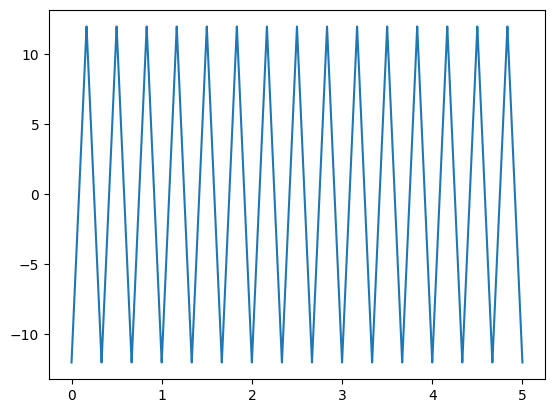

In [77]:
f_0 = 3

x = triangle(f_0, t)

plt.plot(t, x)
Audio(x, rate=44100)

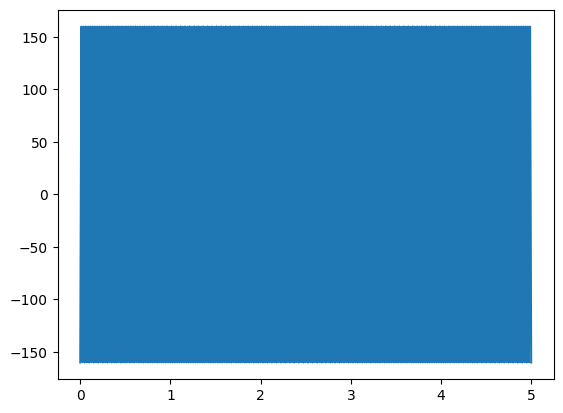

In [78]:
f_0 = 40

x = triangle(f_0, t)

plt.plot(t, x)
Audio(x, rate=44100)

### <span style="color:red"> Exercise 5 </span>

Modulate a middle A with the triangular wave you created in the previous exercise. Play the modulated sound. Change the triagular wave frequency and play the resulting modulated sound. Compare what happens when the frequency is very low (<20Hz) and when it is very high (20-20kHZ).

In [80]:
a = np.cos(2 * np.pi * 440 * t)
y = a * triangle(3, t)

Audio(y, rate=44100)

In [81]:
y = a * triangle(10000, t)

Audio(y, rate=44100)

When the frequency of the modulation is very low, we get a very pronounced "beat" effect. When the mod frequency is high, it overshadows the original fruency so we just get a triangle wave at the modulation frequency for an output.

## Modulation with Square Wave Exercises

### <span style="color:red"> Exercise 6 </span>

Create a periodic square wave with frequency of 3 Hz. The square should occupy half of the period. Play the square wave.

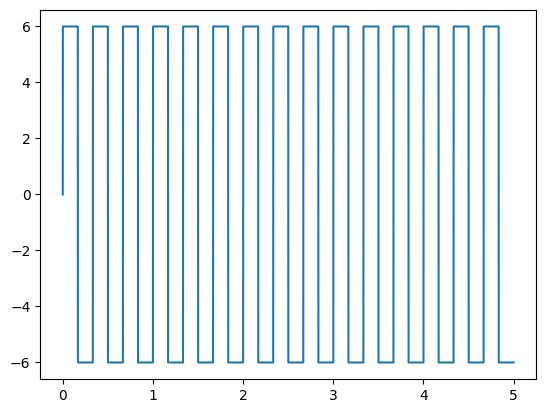

In [88]:
freq = 3
amplitude = 2 * freq
x = np.sin(2 * np.pi * freq * t)
x = np.sign(x) * amplitude

plt.plot(t, x)

### <span style="color:red"> Exercise 7 </span>

Modulate a middle A with the square wave you created in the previous exercise. Play the modulated sound.

In [90]:
y = a * x

Audio(y, rate=44100)

# <span style="color:orange;">  3. The Math Behind Multiplication by a Periodic Carrier </span> 

Because of the properties of complex exponentials, multiplying a signal by a periodic carrier signal results in changing the frequencies of the components of the signal.

For example, multiplying two sine wave together is the same as adding a wave at their average frequency and a wave at their frequency difference. 

Indeed, we have 

$$ \sin\left(  2 \pi f_1 t \right) \sin \left( 2 \pi f_2 t \right) = \frac{1}{2}\cos \left( 2 \pi (f_1-f_2) t \right) - \frac{1}{2}\cos \ \left( 2 \pi (f_1+f_2) t \right).$$


In other words, the frequency $f_1$  in the signal $\sin \left( 2\pi f_1 t\right)$ is divided into two components which are "shifted" to new frequencies on either sides of $f_1$; the extent of the shift is given by the carrier frequency $f_2$.  


### <span style="color:red"> Exercise 8 </span>

Prove the above formula. Hint: Transform the sines into complex exponentials.

Given that
$$\sin(x) = \frac{e^{ix} - e^{-ix}}{2i}$$

Define $x_1 = 2\pi f_1t$, $x_2 = 2\pi f_2t$
$$\sin(x_1)\sin(x_2) = \left( \frac{e^{ix_1} - e^{-ix_1}}{2i} * \frac{e^{ix_2} - e^{-ix_2}}{2i} \right)$$

$$ = \frac{e^{i(x_1 + x_2)} + e^{-i(x_1 + x_2)} - e^{i(x_1 - x_2)} - e^{-i(x_1 - x_2)}}{-4}$$

$$ = - \frac{e^{i(x_1 + x_2)} + e^{-i(x_1 + x_2)}}{4} + \frac{e^{i(x_1 - x_2)} + e^{-i(x_1 - x_2)}}{4}$$

We know cosine can be written as,
$$\cos(x) = \frac{e^{ix} + e^{-ix}}{2}$$

Therefore,
$$ = - \frac{1}{2} \cos(x_1 + x_2) + \frac{1}{2} \cos(x_1 - x_2)$$

Plugging in for $x_1$ and $x_2$,

$$\sin\left( 2 \pi f_1 t \right) \sin \left( 2 \pi f_2 t \right) = - \frac{1}{2} \cos(2 \pi f_1 t + 2 \pi f_2 t) + \frac{1}{2} \cos(2 \pi f_1 t - 2 \pi f_2 t)$$

$$\sin\left( 2 \pi f_1 t \right) \sin \left( 2 \pi f_2 t \right) = \frac{1}{2} \cos(2 \pi t(f_1 - f_2)) - \frac{1}{2} \cos(2 \pi t (f_1 + f_2)$$

## <span style="color:green;"> Reflection </span>

Do not skip this section! Lab will be graded only on completion of this section.

__1. What parts of the lab, if any, do you feel you did well? <br>
2. What are some things you learned today? <br>
3. Are there any topics that could use more clarification? <br>
4. Do you have any suggestions on parts of the lab to improve?__

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. I think I did the wave generation part well after a hint from the TA to just google the waves. And the maths part in Excercise 8 went a lot better than last week's lab.
2. I learned how to generate different forms of waves (triangle and square) and how they can be used to modulate an input signal to give a different output.
3. For me, this was all stuff from ECE301 so it already made sense, I think more practice with the topics though could help clarify in the long run.
4. Some of the wording could be better, for example when asking for a triangle wave function, maybe specify that it should be a custom function; my first thought was to just use Scipy signal generator. And also for the square wave, remebering to mention that the area under the squares should still equal 1 like the triangle case.